In [1]:

import radiative_transfer_bnn as rt

#import torch

import numpy as np

import matplotlib.pyplot as plt

import plotter as pltr

import pandas as pd

In [2]:
model = rt.RadiativeTransferBNN(1000, 0.3, 0.01, 'flux')
model.preprocess_data()
model.train_model(250, 200)
wavelength = model.wavelength
mean_pred_results, std_pred_results = model.test_model()
x_test = model.X_test
y_test = model.y_test

c:\Users\joshu\OneDrive\Desktop\Physics_Year_3\Final_year_project\Github\project_script\src\semester2\week4\radiative_transfer_bnn.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([


Training the model...
- epoch 1/250 - cost: 10.505, kl:                 0.053
- epoch 2/250 - cost: 5.982, kl:                 0.092
- epoch 3/250 - cost: 4.484, kl:                 0.128
- epoch 4/250 - cost: 2.806, kl:                 0.158
- epoch 5/250 - cost: 1.598, kl:                 0.182
- epoch 6/250 - cost: 1.081, kl:                 0.200
- epoch 7/250 - cost: 0.846, kl:                 0.214
- epoch 8/250 - cost: 0.586, kl:                 0.223
- epoch 9/250 - cost: 0.443, kl:                 0.230
- epoch 10/250 - cost: 0.474, kl:                 0.234
- epoch 11/250 - cost: 0.394, kl:                 0.237
- epoch 12/250 - cost: 0.275, kl:                 0.239
- epoch 13/250 - cost: 0.374, kl:                 0.240
- epoch 14/250 - cost: 0.219, kl:                 0.241
- epoch 15/250 - cost: 0.182, kl:                 0.242
- epoch 16/250 - cost: 0.381, kl:                 0.242
- epoch 17/250 - cost: 0.217, kl:                 0.242
- epoch 18/250 - cost: 0.287, kl: 

In [4]:
cost_vs_epoch_df = model.cost_vs_epoch()

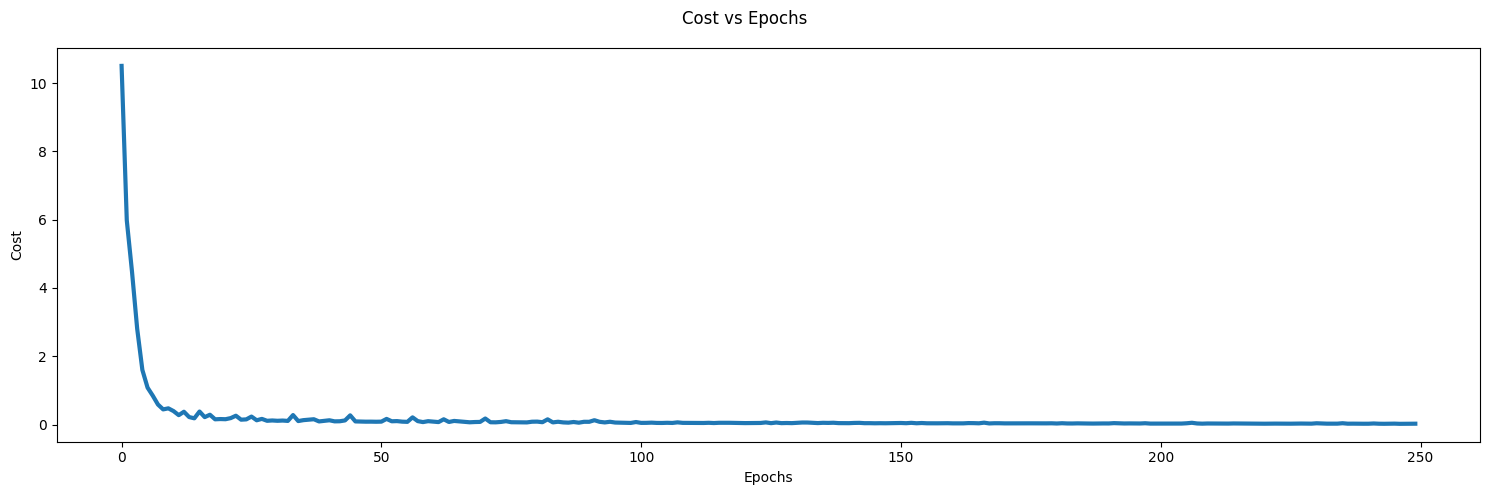

In [8]:
plotter = pltr.Plotter(cost_vs_epoch_df['epoch'],cost_vs_epoch_df['cost'])
plotter.cost_vs_epochs()

In [ ]:
# star_mass = torch.linspace(10.5, 10.5, 20)
# dust_mass = torch.linspace(7, 7, 20)
# theta = torch.linspace(-180, 180, 20)
# x_pred = model.create_predict_tensor(star_mass, dust_mass, theta)
# print(x_pred.shape)
# mean_pred_results, std_pred_results = model.predict(x_pred)

In [ ]:
# plotter = pltr.Plotter(wavelength, mean_pred_results, x_test, y_test,"f")
# plotter.plot_same_ax(0,20,1)

#it's not changing enough for angle
# you can only notice a change by going outside the range of values
#is this to do with normalisation when training the model?
# most likely
#is it worth seeing how SKIRT changes with angle?
#maybe create a function that groups SKIRT data over a range, no we need to generate more for fixed values
#see if the sub-runs are any different, for, like, 3-4 runs; if no conclusive difference, then yeah

In [ ]:
# np.savez('data_file.npz', wavelength=wavelength, mean_pred_results=mean_pred_results,
#         std_pred_results=std_pred_results, x_test=x_test, y_test=y_test)

In [ ]:
loaded_data = np.load('data_file.npz')
wavelength = loaded_data['wavelength']
mean_pred_results = loaded_data['mean_pred_results']
std_pred_results = loaded_data['std_pred_results']
x_test = loaded_data['x_test']
y_test = loaded_data['y_test']

In [ ]:
print(x_test.shape)

(230, 3)


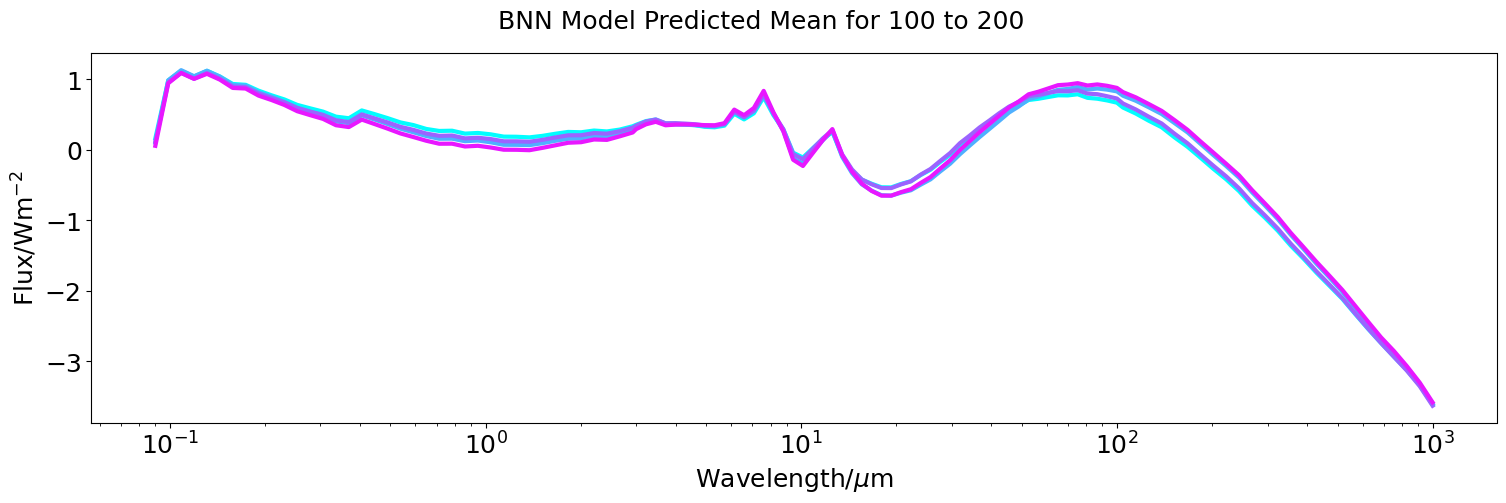

In [ ]:
plotter = pltr.Plotter(wavelength, mean_pred_results, x_test, y_test,"f")

#plotter.plot_single(150, "grey", "salmon")
#plotter.plot_group_same(100, 120, "grey", "salmon")
plotter.plot_same_ax(100,200,30,'cool')
#plotter.save_figure("test.png")


In [ ]:
#write prdeict function on saved model
#linear interpolation of extremes
#can only predict within the range of the training data
#what about extrapolation?
#comapare for extraploation can use predict function
#what is the uncertainty of the prediction
#Produce SED 

In [ ]:
#plotter function add std deviation
#change labels
#cost_vs_epochs plot
#ask steven about datd
#generate data for fixed values
